In [1]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly
!pip install geopy

In [2]:
#  Import Libraries


from bs4 import BeautifulSoup

import geopy

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
df = pd.read_csv ('https://opendata.com.pk/dataset/9e959916-1cfc-4e28-85c8-f10ff63e5df2/resource/8c882a14-ee3f-4534-a15f-5fec2319d5e5/download/zameen-updated.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [4]:
# Using location that are of Karachi only

df=df[df['city'].str.contains('Karachi')]
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
156,86575,6649,https://www.zameen.com/Property/faisal_cantonm...,House,450000000,Cantt,Karachi,Sindh,24.889395,67.098627,7,4 Kanal,For Sale,6,06-20-2019,Premier Properties,Aamir Motiwala,Kanal,4.0,1-5 Kanal
157,342005,232,https://www.zameen.com/Property/karachi_gulist...,House,35000000,Gulistan-e-Jauhar,Karachi,Sindh,24.914988,67.138702,8,16 Marla,For Sale,6,07-18-2019,NaN,NaN,Marla,16.0,15-20 Marla
158,466607,1484,https://www.zameen.com/Property/d_h_a_dha_phas...,Flat,21000000,DHA Defence,Karachi,Sindh,24.814367,67.072083,3,8.9 Marla,For Sale,3,10-20-2018,NaN,NaN,Marla,8.9,5-10 Marla
159,678919,9594,https://www.zameen.com/Property/malir_malir_ka...,House,6500000,Malir,Karachi,Sindh,24.882302,67.184677,1,3.2 Marla,For Sale,2,03-10-2019,NaN,NaN,Marla,3.2,0-5 Marla
160,813506,6732,https://www.zameen.com/Property/surjani_town_s...,House,13000000,Gadap Town,Karachi,Sindh,25.018156,67.066864,4,9.6 Marla,For Sale,4,07-18-2019,NaN,NaN,Marla,9.6,5-10 Marla


In [5]:
df.shape

(60484, 20)

In [6]:
# Forming a new dataframe with our desired parameters 

data=df[['property_type','price','location','city','latitude','longitude','Area Size','bedrooms']].copy()
data.head()

,property_type,price,location,city,latitude,longitude,Area Size,bedrooms
156,House,450000000,Cantt,Karachi,24.889395,67.098627,4.0,6
157,House,35000000,Gulistan-e-Jauhar,Karachi,24.914988,67.138702,16.0,6
158,Flat,21000000,DHA Defence,Karachi,24.814367,67.072083,8.9,3
159,House,6500000,Malir,Karachi,24.882302,67.184677,3.2,2
160,House,13000000,Gadap Town,Karachi,25.018156,67.066864,9.6,4


In [7]:
# Converting datatype to float

df['price']=df['price'].astype(float)
df['latitude']=df['latitude'].astype(float)
df['longitude']=df['longitude'].astype(float)
df['Area Size']=df['Area Size'].astype(float)

In [8]:
#  Modifying data as per need

grouped_multiple = df.groupby(['property_type','location','city']).agg({'latitude': ['mean'],'longitude': ['mean'],'price': ['mean', 'min', 'max'],'Area Size': ['mean', 'min', 'max'],'bedrooms':['mean', 'min', 'max','count']})
grouped_multiple.columns = ['mean_latitude','mean_longitude','price_mean', 'price_min', 'price_max','area_mean', 'are_min', 'area_max','bedroom_mean','bedroom_min','bedroom_max','total_houses']
grouped_multiple = grouped_multiple.reset_index()

grouped_multiple.head()

,property_type,location,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,Farm House,Bahria Town Karachi,Karachi,24.991752,67.255541,6.273810e+07,25000000.0,140000000.0,9.409524,6.0,19.4,0.523810,0,11,21
1,Farm House,Bin Qasim Town,Karachi,24.865622,67.284917,3.003625e+07,20000.0,120000000.0,17.000000,12.0,20.0,3.500000,2,5,4
2,Farm House,DHA City Karachi,Karachi,25.015873,67.418095,3.457357e+07,15000.0,70000000.0,4.142857,2.0,7.0,2.714286,0,4,7
3,Farm House,DHA Defence,Karachi,24.819653,67.077749,2.500000e+04,25000.0,25000.0,7.000000,7.0,7.0,2.000000,2,2,1
4,Farm House,Damba,Karachi,24.972520,67.259372,3.650000e+04,28000.0,45000.0,8.000000,8.0,8.0,0.000000,0,0,2


In [9]:
grouped_multiple.shape

(580, 15)

In [10]:

df_homes=grouped_multiple

# Removing all farm houses from dataframe
df_homes=df_homes[~df_homes['property_type'].str.contains('Farm House')]

df_homes.head()

,property_type,location,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
17,Flat,ASF Housing Scheme,Karachi,24.937917,67.153712,3.885333e+06,2800000.0,5800000.0,4.366667,3.8,5.1,2.666667,2,4,3
18,Flat,ASF Tower,Karachi,24.951961,67.158682,5.461538e+06,1700000.0,8500000.0,5.992308,2.3,8.9,2.538462,0,6,13
19,Flat,Abdullah Ahmed Road,Karachi,24.891224,66.988458,5.000000e+06,5000000.0,5000000.0,5.000000,5.0,5.0,0.000000,0,0,1
20,Flat,Abdullah Haroon Road,Karachi,24.848067,67.031176,3.125000e+07,12500000.0,50000000.0,8.900000,6.7,11.1,3.500000,3,4,2
21,Flat,Abid Town,Karachi,24.927597,67.083332,5.492900e+06,23000.0,13000000.0,5.040000,4.0,7.1,2.400000,0,3,10


In [11]:
#  Selecting only houses in our dataframe

df_homes=df_homes[df_homes['property_type'].str.contains('House')]
df_homes=df_homes.reset_index()
df_homes.head()

,index,property_type,location,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,185,House,APP Employees Co-operative Housing Society,Karachi,24.928572,67.157725,3.900000e+07,39000000.0,39000000.0,16.00,16.0,16.0,8.000000,8,8,2
1,186,House,ASF Housing Scheme,Karachi,24.937917,67.153713,7.000000e+06,7000000.0,7000000.0,4.80,4.8,4.8,4.000000,4,4,1
2,187,House,Abdullah Ahmed Road,Karachi,24.891224,66.988458,6.645000e+07,2900000.0,130000000.0,3.00,1.0,5.0,2.500000,0,5,2
3,188,House,Abdullah Haroon Road,Karachi,24.847829,67.031185,1.088000e+07,400000.0,30000000.0,8.36,1.0,16.0,4.200000,2,7,5
4,189,House,Abid Town,Karachi,24.924261,67.082496,1.493257e+07,28000.0,28000000.0,4.80,1.8,9.6,4.714286,1,11,7


In [12]:
# dropping index column

df_homes=df_homes.drop(['index'],axis=1)

In [13]:
df_homes.head()

,property_type,location,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,House,APP Employees Co-operative Housing Society,Karachi,24.928572,67.157725,3.900000e+07,39000000.0,39000000.0,16.00,16.0,16.0,8.000000,8,8,2
1,House,ASF Housing Scheme,Karachi,24.937917,67.153713,7.000000e+06,7000000.0,7000000.0,4.80,4.8,4.8,4.000000,4,4,1
2,House,Abdullah Ahmed Road,Karachi,24.891224,66.988458,6.645000e+07,2900000.0,130000000.0,3.00,1.0,5.0,2.500000,0,5,2
3,House,Abdullah Haroon Road,Karachi,24.847829,67.031185,1.088000e+07,400000.0,30000000.0,8.36,1.0,16.0,4.200000,2,7,5
4,House,Abid Town,Karachi,24.924261,67.082496,1.493257e+07,28000.0,28000000.0,4.80,1.8,9.6,4.714286,1,11,7


In [14]:
df_homes.shape

(160, 15)

In [15]:
# convert an address into latitude and longitude values

address = 'Karachi, KHI'

geolocator = Nominatim(user_agent="karachi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Karachi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Karachi are 24.9014311, 67.15934789666397.


In [16]:
# create map of Karachi using latitude and longitude values
map_karachi = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, location in zip(df_homes['mean_latitude'], df_homes['mean_longitude'], df_homes['location']):
    label = '{}'.format(location)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_karachi)  
    
map_karachi

In [17]:
#  FourSquare credntials

CLIENT_ID = 'RGW4SIWSLHM1ARZ04AKEVOSTH2451TPTLUZPTNRV5P541QCY' # your Foursquare ID
CLIENT_SECRET = '4ASACGFVZ03ESPLD1J4NLHNU0EAXYP14DWQCGZ40VZTX2FJ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RGW4SIWSLHM1ARZ04AKEVOSTH2451TPTLUZPTNRV5P541QCY
CLIENT_SECRET:4ASACGFVZ03ESPLD1J4NLHNU0EAXYP14DWQCGZ40VZTX2FJ4


In [18]:
neighborhood_latitude = df_homes.loc[0, 'mean_latitude'] # neighborhood latitude value
neighborhood_longitude = df_homes.loc[0, 'mean_longitude'] # neighborhood longitude value

neighborhood_name = df_homes.loc[0, 'location'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of APP Employees Co-operative Housing Society are 24.928572, 67.157725.


In [19]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RGW4SIWSLHM1ARZ04AKEVOSTH2451TPTLUZPTNRV5P541QCY&client_secret=4ASACGFVZ03ESPLD1J4NLHNU0EAXYP14DWQCGZ40VZTX2FJ4&v=20180605&ll=24.928572,67.157725&radius=500&limit=100'

In [20]:
# Extracting results fron Foursquare

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60c769c1abacf210907a3b89'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 1,
  'suggestedBounds': {'ne': {'lat': 24.933072004500005,
    'lng': 67.16267805950979},
   'sw': {'lat': 24.924071995499993, 'lng': 67.15277194049021}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58af240e0037eb2c41d72797',
       'name': "Saien's Chai",
       'location': {'address': 'Pink Residency',
        'crossStreet': 'Gulistan e johar Block-8',
        'lat': 24.92731,
        'lng': 67.160069,
       

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-22-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Saien's Chai,Coffee Shop,24.92731,67.160069


In [23]:
nearby_venues.shape

(1, 4)

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

1 venues were returned by Foursquare.


In [25]:
# Making a function to get nearby venuues


def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
karachi_venues = getNearbyVenues(names=df_homes['location'],
                                   latitudes=df_homes['mean_latitude'],
                                   longitudes=df_homes['mean_longitude']
                                  )

APP Employees Co-operative Housing Society
ASF Housing Scheme
Abdullah Ahmed Road
Abdullah Haroon Road
Abid Town
Abul Hassan Isphani Road
Airport
Aisha Manzil
Al-Hilal Society
Al-Jadeed Residency
Al-Manzar Society
Allama Iqbal Town
Altaf Hussain Road
Amil Colony
Amir Khusro
Anda Mor Road
Azam Town
Bagh-e-Korangi
Bahria Town Karachi
Baldia Town
Baloch Colony
Bath Island
Bilal Town
Bin Qasim Town
Blue Bell Residency
Cantt
Chapal Courtyard
Chapal Skymark
Chapal Uptown
Civil Lines
Clifton
Cotton Export Cooperative Housing Society
Cutchi Memon Cooperative Housing Society
DHA City Karachi
DHA Defence
Dalmia Cement Factory Road
Darul Aman Society
Dastgir Colony
Defence View Society
Delhi Colony
Diamond City
Etawa Society
Falaknaz Presidency
Falcon Complex Faisal
Fazaia Housing Scheme
Federal B Area
Gadap Town
Garden West
Gizri
Gizri Road
Golimar
Gujjar Chowk
Gulberg Town
Gulistan-e-Jauhar
Gulistan-e-Malir
Gulshan-e-Areesha
Gulshan-e-Iqbal Town
Gulshan-e-Jami
Gulshan-e-Malir
Gulshan-e-Millat
G

In [27]:
print('There are {} uniques categories.'.format(len(karachi_venues['Venue Category'].unique())))

There are 107 uniques categories.


In [28]:
print(karachi_venues.shape)
karachi_venues.head(10)

(498, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,APP Employees Co-operative Housing Society,24.928572,67.157725,Saien's Chai,24.927310,67.160069,Coffee Shop
1,ASF Housing Scheme,24.937917,67.153713,Bin Hashim,24.938233,67.151470,Department Store
2,ASF Housing Scheme,24.937917,67.153713,Muslim Pharmacy & Super Market,24.938128,67.151982,Shopping Mall
3,ASF Housing Scheme,24.937917,67.153713,Al-Ghazi Foods Tonight,24.940844,67.153694,Fast Food Restaurant
4,ASF Housing Scheme,24.937917,67.153713,Sindh Green Restaurant,24.939285,67.157438,BBQ Joint
5,Abdullah Haroon Road,24.847829,67.031185,Frere Hall,24.846787,67.032243,Historic Site
6,Abdullah Haroon Road,24.847829,67.031185,Suzie Wong,24.846505,67.031120,Asian Restaurant
7,Abdullah Haroon Road,24.847829,67.031185,Karachi Club,24.844083,67.029199,Social Club
8,Abdullah Haroon Road,24.847829,67.031185,Sind Club Bistro,24.849628,67.031978,Bistro
9,Abdullah Haroon Road,24.847829,67.031185,Marriott,24.846049,67.031186,Hotel


In [29]:
# Table is grouped on basis of same Neighborhood

k_count=karachi_venues.groupby('Neighborhood').count()
k_count.head(10)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
APP Employees Co-operative Housing Society,1,1,1,1,1,1
ASF Housing Scheme,4,4,4,4,4,4
Abdullah Haroon Road,11,11,11,11,11,11
Abid Town,4,4,4,4,4,4
Abul Hassan Isphani Road,2,2,2,2,2,2
Aisha Manzil,2,2,2,2,2,2
Al-Hilal Society,1,1,1,1,1,1
Al-Jadeed Residency,1,1,1,1,1,1
Allama Iqbal Town,4,4,4,4,4,4


In [30]:
#  Sorting in descending order based on Venue category

k_count = k_count.sort_values(by ='Venue Category' , ascending=False)
k_count.head(10)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Siraj-ud-Daula Road,30,30,30,30,30,30
Shah Rasool Colony,19,19,19,19,19,19
Shaheed Millat Road,17,17,17,17,17,17
Jamaluddin Afghani Road,17,17,17,17,17,17
Chapal Skymark,14,14,14,14,14,14
Tipu Sultan Road,14,14,14,14,14,14
Civil Lines,14,14,14,14,14,14
DHA Defence,13,13,13,13,13,13
MT Khan Road,12,12,12,12,12,12


In [31]:
df_c = df_homes

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
df_c = k_count.join(df_c.set_index('location'), on='Neighborhood')
df_c.head(10)


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
Neighborhood,,,,,,,,,,,,,,,,,,,,
Siraj-ud-Daula Road,30,30,30,30,30,30,House,Karachi,24.879682,67.068985,2.300000e+08,160000000.0,300000000.0,1.400000,1.0,1.8,2.000000,0,4,2
Shah Rasool Colony,19,19,19,19,19,19,House,Karachi,24.810966,67.034833,9.700000e+07,14000000.0,180000000.0,4.550000,1.9,7.2,2.500000,0,5,2
Shaheed Millat Road,17,17,17,17,17,17,House,Karachi,24.876831,67.070116,5.389147e+07,255000.0,222000000.0,6.311765,1.0,16.0,4.529412,0,11,17
Jamaluddin Afghani Road,17,17,17,17,17,17,House,Karachi,24.884039,67.064471,7.000000e+04,70000.0,70000.0,9.600000,9.6,9.6,3.000000,3,3,1
Chapal Skymark,14,14,14,14,14,14,House,Karachi,24.844343,67.027389,4.250000e+07,42500000.0,42500000.0,10.000000,10.0,10.0,6.000000,6,6,1
Tipu Sultan Road,14,14,14,14,14,14,House,Karachi,24.876120,67.085330,2.617250e+07,75000.0,82500000.0,5.640000,1.0,18.0,3.600000,0,7,10
Civil Lines,14,14,14,14,14,14,House,Karachi,24.845670,67.030077,2.958000e+07,24900000.0,38000000.0,8.040000,6.4,10.7,3.200000,3,4,5
DHA Defence,13,13,13,13,13,13,House,Karachi,24.808753,67.063815,8.094658e+07,1.0,700000000.0,3.541619,1.0,20.0,4.845252,0,15,5286
MT Khan Road,12,12,12,12,12,12,House,Karachi,24.845752,67.022147,6.433333e+06,4000000.0,8300000.0,4.000000,3.2,4.8,3.333333,2,5,3


<AxesSubplot:xlabel='price_mean', ylabel='Venue Category'>

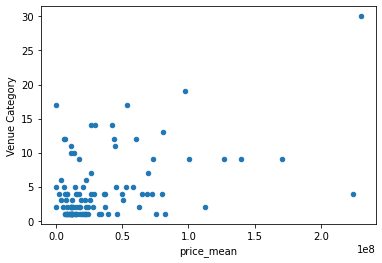

In [32]:
df_c.plot(x="price_mean", y="Venue Category", kind="scatter")

<AxesSubplot:xlabel='price_mean', ylabel='area_mean'>

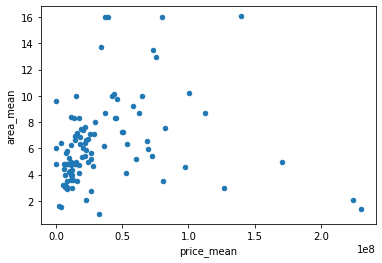

In [33]:
df_c.plot(x='price_mean', y="area_mean", kind="scatter") 


<AxesSubplot:xlabel='price_mean', ylabel='bedroom_mean'>

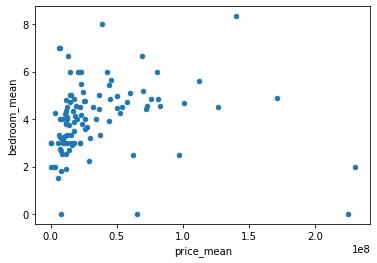

In [34]:
df_c.plot(x='price_mean', y="bedroom_mean", kind="scatter") 

In [35]:
# Grouping dataframe on basis of neighbourhood and venuecategory with its value count

k_grouped=karachi_venues.groupby(['Neighborhood']).agg({'Venue Category': ['value_counts']})

k_grouped.head(20)

Venue Category
                                                                  value_counts
Neighborhood                               Venue Category                     
APP Employees Co-operative Housing Society Coffee Shop                       1
ASF Housing Scheme                         BBQ Joint                         1
                                           Department Store                  1
                                           Fast Food Restaurant              1
                                           Shopping Mall                     1
Abdullah Haroon Road                       Café                              2
                                           Social Club                       2
                                           Asian Restaurant                  1
                                           Bakery                            1
                                           Bistro                            1
                                           Fast Food Restaurant              1
                                           Historic Site                     1
                                           Hotel                             1
                                           Hotel Pool                        1
Abid Town                                  BBQ Joint                         1
                                           Boutique                          1
                                           Park                              1
                                           Sporting Goods Shop               1
Abul Hassan Isphani Road                   Café                              1
                                           Grocery Store                     1

In [36]:
#  Unstacking the grouped to find the venue categories as colums

k_df = k_grouped.unstack()
print(k_df.shape)
k_df.tail(10)



(106, 107)


Venue Category                    \
                                               value_counts                     
Venue Category                            Accessories Store Afghan Restaurant   
Neighborhood                                                                    
Shahrah-e-Pakistan                                      NaN               NaN   
Siraj-ud-Daula Road                                     NaN               NaN   
Suparco Road                                            NaN               NaN   
Super Highway                                           NaN               2.0   
Surti Muslim Co-Operative Housing Society               NaN               NaN   
Tariq Road                                              NaN               NaN   
Teacher Society                                         NaN               NaN   
Tipu Sultan Road                                        NaN               NaN   
University Road                                         NaN               NaN   
Zamzama                                                 NaN               NaN   

                                                              \
                                                               
Venue Category                            African Restaurant   
Neighborhood                                                   
Shahrah-e-Pakistan                                       NaN   
Siraj-ud-Daula Road                                      NaN   
Suparco Road                                             NaN   
Super Highway                                            NaN   
Surti Muslim Co-Operative Housing Society                NaN   
Tariq Road                                               NaN   
Teacher Society                                          NaN   
Tipu Sultan Road                                         NaN   
University Road                                          NaN   
Zamzama                                                  NaN   

                                                               \
                                                                
Venue Category                            American Restaurant   
Neighborhood                                                    
Shahrah-e-Pakistan                                        NaN   
Siraj-ud-Daula Road                                       1.0   
Suparco Road                                              NaN   
Super Highway                                             NaN   
Surti Muslim Co-Operative Housing Society                 NaN   
Tariq Road                                                NaN   
Teacher Society                                           NaN   
Tipu Sultan Road                                          NaN   
University Road                                           NaN   
Zamzama                                                   NaN   

                                                                               \
                                                                                
Venue Category                            Asian Restaurant Athletics & Sports   
Neighborhood                                                                    
Shahrah-e-Pakistan                                     NaN                NaN   
Siraj-ud-Daula Road                                    NaN                NaN   
Suparco Road                                           NaN                NaN   
Super Highway                                          NaN                NaN   
Surti Muslim Co-Operative Housing Society              NaN                NaN   
Tariq Road                                             NaN                NaN   
Teacher Society                                        NaN                NaN   
Tipu Sultan Road                                       NaN                NaN   
University Road                                        NaN                NaN   
Zamzama                                          

In [37]:
k_df=k_df.reset_index()

In [38]:
#  Forming a new dataframe with desired venues for our use

df_v=pd.DataFrame(columns=['location','Shopping Mall','Department Store','Bakery','Restaurant','Park','Market','Pharmacy'])

df_v['location']= k_df['Neighborhood']
df_v['Shopping Mall']=k_df['Venue Category','value_counts','Shopping Mall']
df_v['Department Store']=k_df['Venue Category','value_counts','Department Store']
df_v['Bakery']=k_df['Venue Category','value_counts','Bakery']
df_v['Restaurant']=k_df['Venue Category','value_counts','Restaurant']
df_v['Park']=k_df['Venue Category','value_counts','Park']
df_v['Market']=k_df['Venue Category','value_counts','Market']
df_v['Pharmacy']=k_df['Venue Category','value_counts','Pharmacy']

# Getting sum of all the venues in the locality near house
df_v['Total venues']= df_v.iloc[:, -7:-1].sum(axis=1)

df_v.tail(10)




,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues
96,Shahrah-e-Pakistan,NaN,2.0,3.0,NaN,NaN,NaN,NaN,5.0
97,Siraj-ud-Daula Road,NaN,2.0,NaN,NaN,1.0,1.0,NaN,4.0
98,Suparco Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
99,Super Highway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
100,Surti Muslim Co-Operative Housing Society,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
101,Tariq Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
102,Teacher Society,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
103,Tipu Sultan Road,NaN,1.0,1.0,NaN,NaN,NaN,1.0,2.0
104,University Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
105,Zamzama,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [39]:
# Sorting on basis of total venues in descending order

df_v = df_v.sort_values(by ='Total venues' , ascending=False)

df_v=df_v.reset_index()
df_v=df_v.drop(['index'],axis=1)
df_v.head(10)


,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues
0,Shahrah-e-Pakistan,NaN,2.0,3.0,NaN,NaN,NaN,NaN,5.0
1,Maskan Chowrangi,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4.0
2,Siraj-ud-Daula Road,NaN,2.0,NaN,NaN,1.0,1.0,NaN,4.0
3,Others,1.0,NaN,NaN,1.0,NaN,1.0,NaN,3.0
4,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0
5,Nazimabad,NaN,1.0,NaN,NaN,1.0,1.0,NaN,3.0
6,North Nazimabad,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0
7,Hill Park,1.0,NaN,1.0,NaN,1.0,NaN,NaN,3.0
8,Blue Bell Residency,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0
9,Shahra-e-Qaideen,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0


In [40]:
df_v.shape

(106, 9)

In [41]:
? Removing rows 

df_v=df_v[df_v['Total venues'] != 0.0]

df_v=df_v[~df_v['location'].str.contains('Others')]

df_v.shape



Object ` Removing rows` not found.


(52, 9)

In [42]:
df_v5=df_v.head(10)


<AxesSubplot:xlabel='location'>

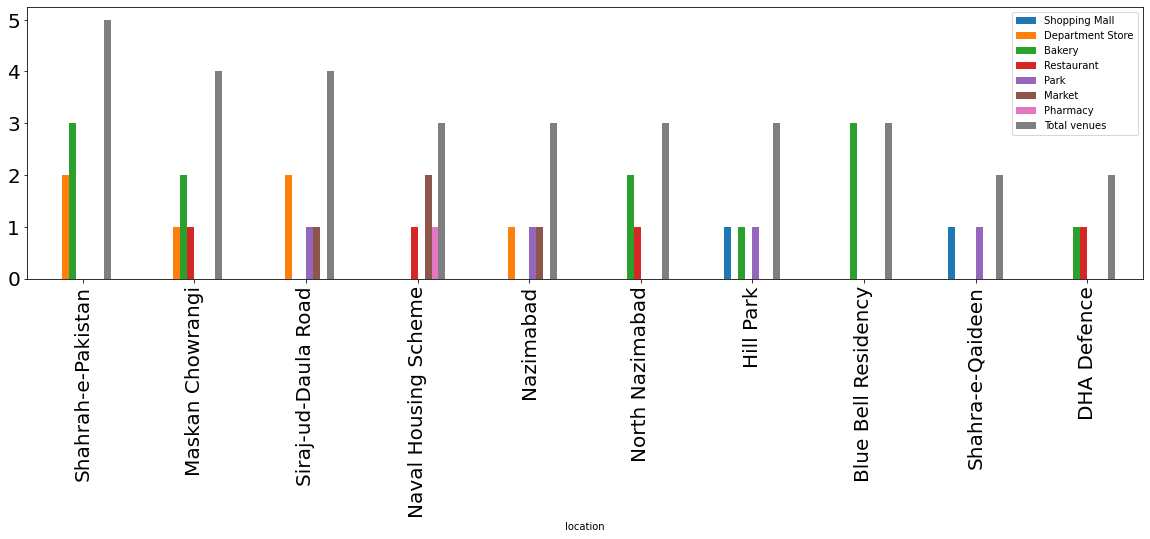

In [43]:
df_v5.plot(x="location",kind="bar", fontsize=20,figsize=(20, 5))

In [44]:
# Merging data frames to add with older dataframe have price and coordinates

df_combined = df_homes

# merge datasets
df_combined = df_v.join(df_combined.set_index('location'), on='location')
df_combined.head(10)


,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,Shahrah-e-Pakistan,NaN,2.0,3.0,NaN,NaN,NaN,NaN,5.0,House,Karachi,24.934436,67.072266,1.265000e+08,23000000.0,230000000.0,3.000000,1.2,4.8,4.500000,3,6,2
1,Maskan Chowrangi,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4.0,House,Karachi,24.934847,67.105248,1.160000e+07,11200000.0,12000000.0,4.000000,3.6,4.4,4.000000,4,4,2
2,Siraj-ud-Daula Road,NaN,2.0,NaN,NaN,1.0,1.0,NaN,4.0,House,Karachi,24.879682,67.068985,2.300000e+08,160000000.0,300000000.0,1.400000,1.0,1.8,2.000000,0,4,2
4,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0,House,Karachi,24.840295,67.057387,7.293821e+07,140000.0,150000000.0,13.464286,1.0,14.0,4.535714,0,8,28
5,Nazimabad,NaN,1.0,NaN,NaN,1.0,1.0,NaN,3.0,House,Karachi,24.914618,67.029741,3.690564e+07,16000.0,350000000.0,8.672146,1.0,19.5,3.351598,0,11,219
6,North Nazimabad,NaN,NaN,2.0,1.0,NaN,NaN,NaN,3.0,House,Karachi,24.942891,67.046485,4.412318e+07,20000.0,260000000.0,8.338095,1.0,19.6,3.925025,0,68,987
7,Hill Park,1.0,NaN,1.0,NaN,1.0,NaN,NaN,3.0,House,Karachi,24.868021,67.071147,3.638095e+07,35000.0,80000000.0,6.166667,1.0,12.0,4.428571,0,7,21
8,Blue Bell Residency,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,House,Karachi,24.837117,67.035573,6.000000e+06,6000000.0,6000000.0,4.400000,4.4,4.4,7.000000,7,7,1
9,Shahra-e-Qaideen,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,House,Karachi,24.872849,67.038423,3.537500e+06,700000.0,12000000.0,1.500000,1.2,2.4,4.250000,0,10,4
10,DHA Defence,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,House,Karachi,24.808753,67.063815,8.094658e+07,1.0,700000000.0,3.541619,1.0,20.0,4.845252,0,15,5286


<AxesSubplot:xlabel='price_mean', ylabel='Total venues'>

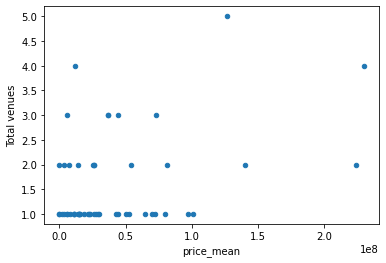

In [45]:
df_combined.plot(x="price_mean", y="Total venues", kind="scatter")

### Hypothesis 1
Null Hypothesis           𝐻0:  price_mean is not correlated with Total_venues

Alternative Hypothesis    𝐻1:  price_mean is correlated with Total_venues

In [46]:
import scipy.stats

In [47]:
scipy.stats.pearsonr(df_combined['price_mean'], df_combined['Total venues'])

(0.3845605883805333, 0.004880352224622747)

#### Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between price_mean and Total_venues

### Hypothesis 2
Null Hypothesis           𝐻0:  price_mean is not correlated with area_mean

Alternative Hypothesis    𝐻1:  price_mean is correlated with area_mean

<AxesSubplot:xlabel='price_mean', ylabel='area_mean'>

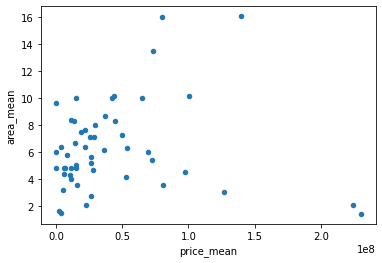

In [48]:
df_combined.plot(x="price_mean", y="area_mean", kind="scatter")

In [49]:
scipy.stats.pearsonr(df_combined['price_mean'], df_combined['area_mean'])

(0.05193646097101594, 0.7146173762718203)

#### Conclusion: Since the p-value > 0.05, we accept the Null hypothesis and conclude that there exists no relationship between price_mean and area_mean

### Hypothesis 3
Null Hypothesis           𝐻0:  price_mean is not correlated bedroom_mean

Alternative Hypothesis    𝐻1:  price_mean is correlated with bedroom_mean

<AxesSubplot:xlabel='price_mean', ylabel='bedroom_mean'>

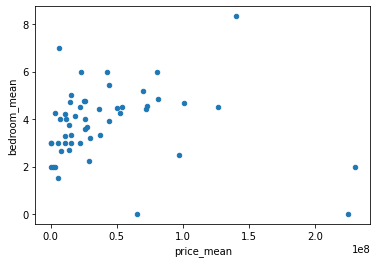

In [50]:
df_combined.plot(x="price_mean", y="bedroom_mean", kind="scatter")

In [51]:
scipy.stats.pearsonr(df_combined['price_mean'], df_combined['bedroom_mean'])

(-0.033782528434371864, 0.812070976289614)

#### Conclusion: Since the p-value > 0.05, we accept the Null hypothesis and conclude that there exists no relationship between price_mean and bedroom_mean

In [52]:
sort_area = df_combined.sort_values(by ='area_mean' , ascending=False)
sort_area.head()

,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
19,Darul Aman Society,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,House,Karachi,24.875484,67.068230,1.400000e+08,70000000.0,180000000.0,16.066667,10.0,19.2,8.333333,5,11,3
41,Allama Iqbal Town,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,House,Karachi,24.926879,67.026472,8.000000e+07,80000000.0,80000000.0,16.000000,16.0,16.0,6.000000,6,6,1
4,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0,House,Karachi,24.840295,67.057387,7.293821e+07,140000.0,150000000.0,13.464286,1.0,14.0,4.535714,0,8,28
25,Zamzama,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.822799,67.040011,1.005878e+08,195000.0,460000000.0,10.189744,1.0,14.0,4.692308,0,7,39
30,Khalid Bin Walid Road,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.874922,67.057322,4.392111e+07,40000.0,100000000.0,10.155556,1.2,16.0,5.444444,0,10,9


In [53]:

sort_area_20 = df_combined.sort_values(by ='area_mean' , ascending=False).head(20)
sort_area_20.head()


,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
19,Darul Aman Society,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,House,Karachi,24.875484,67.068230,1.400000e+08,70000000.0,180000000.0,16.066667,10.0,19.2,8.333333,5,11,3
41,Allama Iqbal Town,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,House,Karachi,24.926879,67.026472,8.000000e+07,80000000.0,80000000.0,16.000000,16.0,16.0,6.000000,6,6,1
4,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0,House,Karachi,24.840295,67.057387,7.293821e+07,140000.0,150000000.0,13.464286,1.0,14.0,4.535714,0,8,28
25,Zamzama,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.822799,67.040011,1.005878e+08,195000.0,460000000.0,10.189744,1.0,14.0,4.692308,0,7,39
30,Khalid Bin Walid Road,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.874922,67.057322,4.392111e+07,40000.0,100000000.0,10.155556,1.2,16.0,5.444444,0,10,9


In [54]:
sort_venues = df_combined.sort_values(by ='Total venues' , ascending=False)

In [55]:
sort_venues_20 = df_combined.sort_values(by ='Total venues' , ascending=False).head(20)
sort_venues_20.head()

,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,Shahrah-e-Pakistan,NaN,2.0,3.0,NaN,NaN,NaN,NaN,5.0,House,Karachi,24.934436,67.072266,1.265000e+08,23000000.0,230000000.0,3.000000,1.2,4.8,4.500000,3,6,2
2,Siraj-ud-Daula Road,NaN,2.0,NaN,NaN,1.0,1.0,NaN,4.0,House,Karachi,24.879682,67.068985,2.300000e+08,160000000.0,300000000.0,1.400000,1.0,1.8,2.000000,0,4,2
1,Maskan Chowrangi,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4.0,House,Karachi,24.934847,67.105248,1.160000e+07,11200000.0,12000000.0,4.000000,3.6,4.4,4.000000,4,4,2
4,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0,House,Karachi,24.840295,67.057387,7.293821e+07,140000.0,150000000.0,13.464286,1.0,14.0,4.535714,0,8,28
5,Nazimabad,NaN,1.0,NaN,NaN,1.0,1.0,NaN,3.0,House,Karachi,24.914618,67.029741,3.690564e+07,16000.0,350000000.0,8.672146,1.0,19.5,3.351598,0,11,219


In [56]:
sort_bedrooms= df_combined.sort_values(by ='bedroom_mean' , ascending=False)

In [57]:

sort_bedrooms_20= df_combined.sort_values(by ='bedroom_mean' , ascending=False).head(20)
sort_bedrooms_20.head()


,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
19,Darul Aman Society,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,House,Karachi,24.875484,67.068230,140000000.0,70000000.0,180000000.0,16.066667,10.0,19.2,8.333333,5,11,3
8,Blue Bell Residency,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,House,Karachi,24.837117,67.035573,6000000.0,6000000.0,6000000.0,4.400000,4.4,4.4,7.000000,7,7,1
32,Old Clifton,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.817883,67.032915,22940000.0,400000.0,110000000.0,2.060000,1.0,4.0,6.000000,0,11,5
41,Allama Iqbal Town,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,House,Karachi,24.926879,67.026472,80000000.0,80000000.0,80000000.0,16.000000,16.0,16.0,6.000000,6,6,1
42,Chapal Skymark,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,House,Karachi,24.844343,67.027389,42500000.0,42500000.0,42500000.0,10.000000,10.0,10.0,6.000000,6,6,1


In [58]:
sv20=sort_venues_20[['location']].copy()

sa20=sort_area_20[['location']].copy()

sb20=sort_bedrooms_20[['location']].copy()


In [59]:
# merging the 3 dataframes on location to find which location has all 3 most venues, bedrooms and larger area size
msav20 = pd.merge(sa20, sv20, on=['location'], how='inner')

msavb20 = pd.merge(msav20,sb20, on=['location'], how='inner')

msavb20

,location
0,Darul Aman Society
1,Naval Housing Scheme
2,Gulberg Town


In [60]:
df_selected = msavb20.join(df_combined.set_index('location'), on='location')
df_selected

,location,Shopping Mall,Department Store,Bakery,Restaurant,Park,Market,Pharmacy,Total venues,property_type,city,mean_latitude,mean_longitude,price_mean,price_min,price_max,area_mean,are_min,area_max,bedroom_mean,bedroom_min,bedroom_max,total_houses
0,Darul Aman Society,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2.0,House,Karachi,24.875484,67.068230,1.400000e+08,70000000.0,180000000.0,16.066667,10.0,19.2,8.333333,5,11,3
1,Naval Housing Scheme,NaN,NaN,NaN,1.0,NaN,2.0,1.0,3.0,House,Karachi,24.840295,67.057387,7.293821e+07,140000.0,150000000.0,13.464286,1.0,14.0,4.535714,0,8,28
2,Gulberg Town,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,House,Karachi,24.924467,67.067157,2.531250e+07,2400000.0,75000000.0,7.118750,1.5,16.0,4.750000,0,10,48


<AxesSubplot:xlabel='location'>

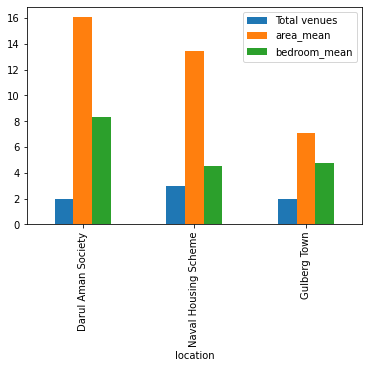

In [61]:
df_selected.plot(x="location", y=["Total venues", "area_mean","bedroom_mean"], kind="bar")